#Q:5 Boundary

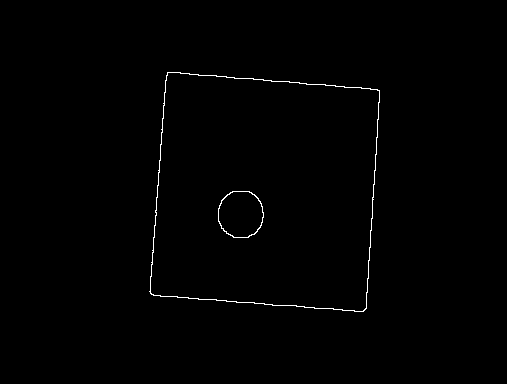

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import math

img = Image.open("/content/Boundary_extraction.png")
img_arr = np.array(img, dtype = np.uint8)

kernal = np.ones((3,3), dtype = np.uint8)

img_arr2 = np.empty_like(img_arr)
img_arr2[:] = img_arr
wall = math.floor(3/2)
temp = np.zeros((3,3), dtype=np.uint8)
product = np.zeros((3,3), dtype=np.uint8)
img_arr3 = np.zeros((np.size(img_arr, 0),np.size(img_arr, 1)), dtype = np.uint8)

for i in range(wall, np.size(img_arr, 0)-wall):
  for j in range(wall, np.size(img_arr, 1)-wall):
    temp = img_arr[i-wall:i+1+wall:1, j-wall:j+1+wall:1]
    flag = 1
    for x in range(3):
      for y in range(3):
        if kernal[x][y] == 1 and temp[x][y] != 1:
          img_arr2[i][j] = 0
          flag = 0
          break
      if flag == 0:
        break
    img_arr3[i][j] = img_arr[i][j] - img_arr2[i][j]
    img_arr3[i][j] = img_arr3[i][j] * 255

img2 = Image.fromarray(img_arr3)
img2